___
# Misc. Imports

In [1]:
import numpy as np 
import pandas as pd 

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

___
# Research Question / Goal

Can we predict the 'total number of medals earned by a country' based solely on the 'number of gold & silver medals earned by a country'?

In other words, can we make this prediction while excluding the 'number of bronze medals earned by a country'?

___
# Data Collection

In [2]:
# Grab/collect the dataset from local files.
medals = pd.read_excel(r'/Users/joelwintering/Documents/DataScienceTTS/tts-ds-fundamentals-course-main/ML Project/zips/olympics/Medals.xlsx', engine='openpyxl')
medals.head()

/Users/joelwintering/anaconda3/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,People's Republic of China,32,22,16,70,2
1,2,United States of America,25,30,22,77,1
2,3,Japan,21,7,12,40,5
3,4,Great Britain,15,18,15,48,4
4,5,Australia,15,4,17,36,6


___
# Data Cleaning

In [2]:
# This 'one-hot encode' block of code was originally included for the sake of converting the country names (strings) to numbers.
# However, this turned out to be pointless, as we just ended up excluding the country names from the feature selection anyways.
# This is because the country names are not necessarily even relevant to the question/goal of this project.

# Aside from that, the dataset is already relatively simple and clean.

# # Create dummy variables for the countries (one-hot encode the categorical data)
# medals_encoded = pd.get_dummies(medals, columns=['Team/NOC'])
# medals_encoded.head()

___
# Exploratory Data Analysis / Visualization

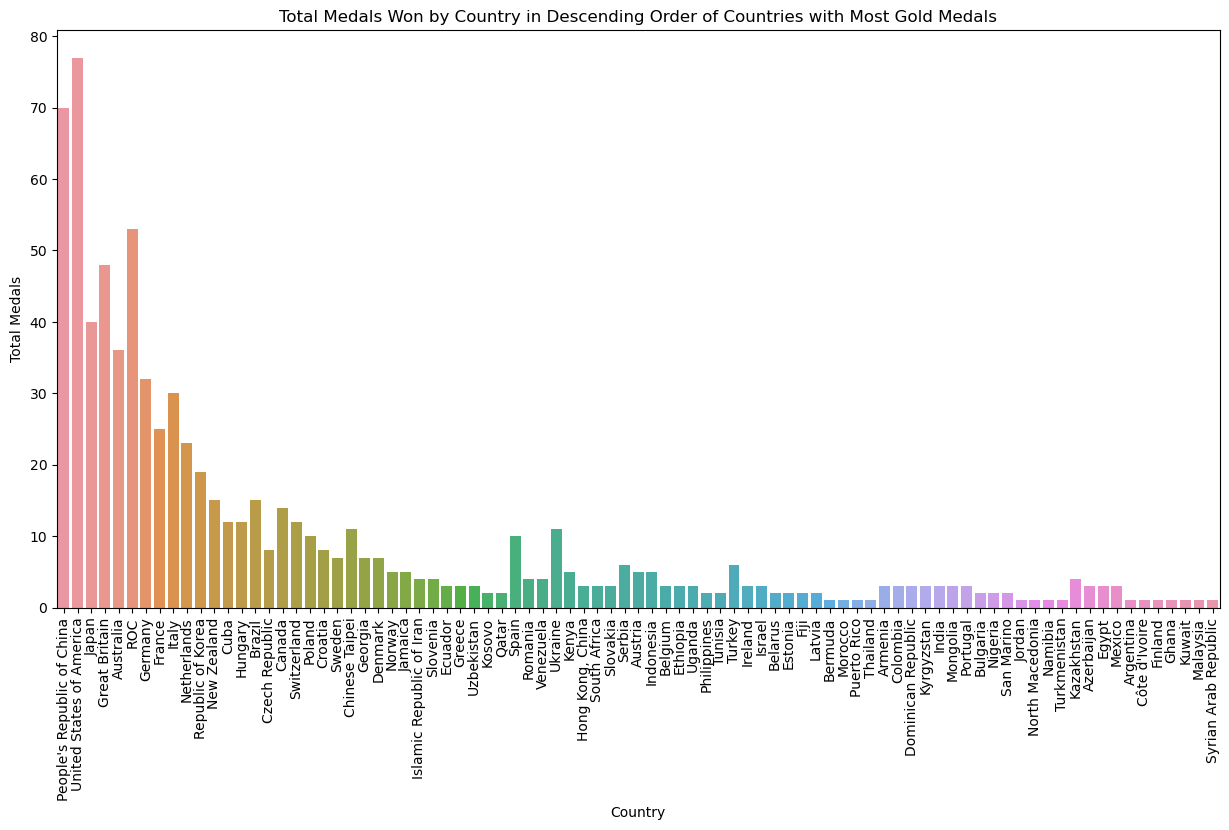

In [4]:
# Exploratory Data Analysis 1 [Joel]

# Create a bar plot of the total number of medals won by each country, 
# in descending order of the countries with the most gold medals.

plt.figure(figsize=(15, 7.5))
sns.barplot(x='Team/NOC', y='Total', data=medals)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.title('Total Medals Won by Country in Descending Order of Countries with Most Gold Medals')
plt.show()

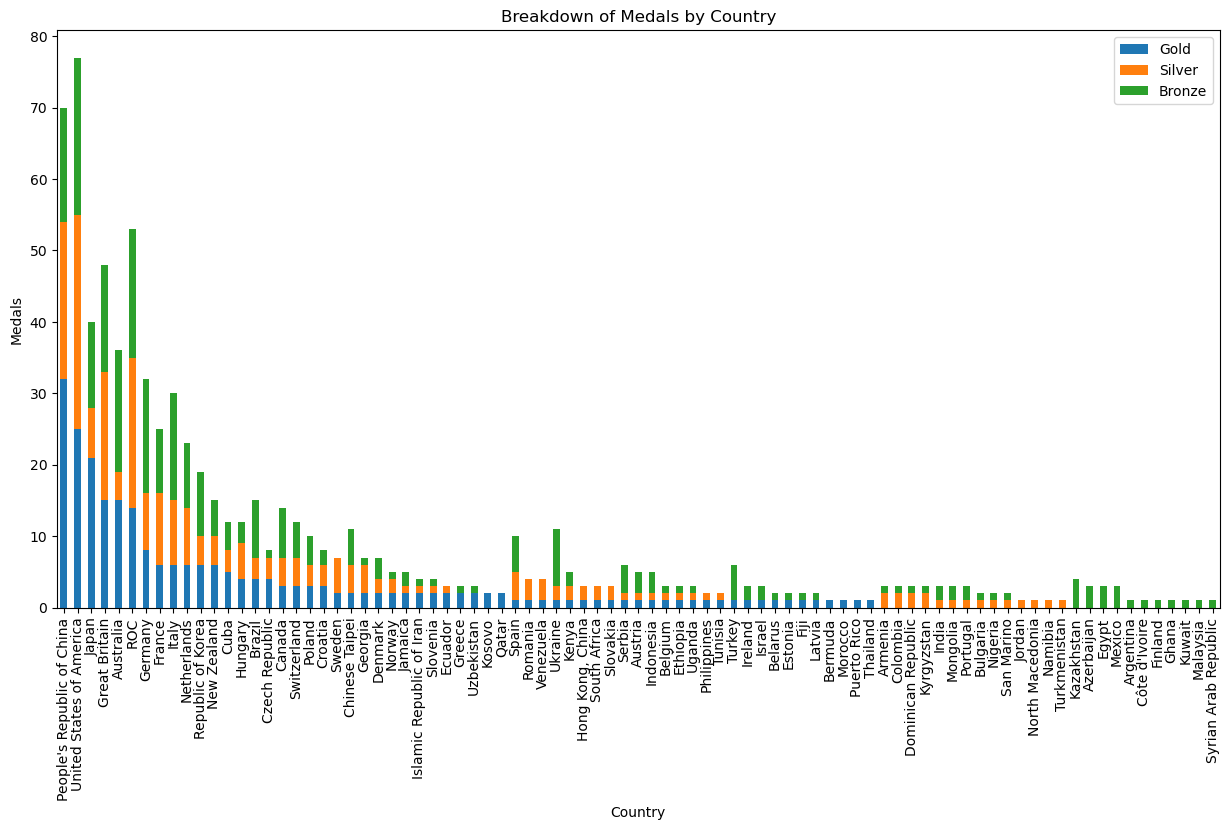

In [5]:
# Exploratory Data Analysis 2 [Joel]

# Create a stacked bar plot of the breakdown of gold, silver, and bronze medals for each country.

medals.plot(x='Team/NOC', y=['Gold', 'Silver', 'Bronze'], kind='bar', stacked=True, figsize=(15, 7.5))
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Medals')
plt.title('Breakdown of Medals by Country')
plt.show()

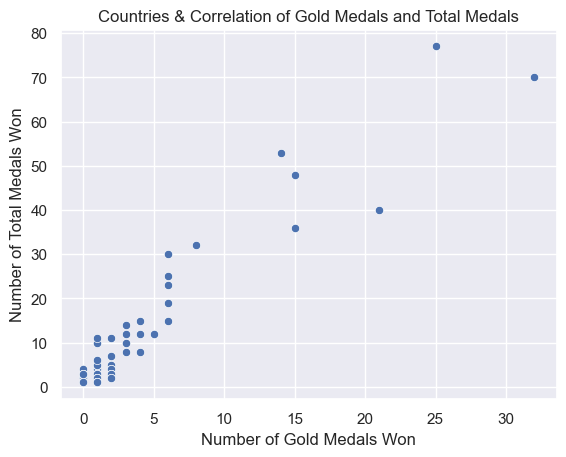

In [6]:
# Exploratory Data Analysis 3 [Jessica]

# Create scatterplot to demonstrate positive correlation between the number of gold medals won and the number of total medals won, per country.

sns.set(color_codes=True)
ax = sns.scatterplot(x = 'Gold', y = 'Total', data = medals)
plt.xlabel('Number of Gold Medals Won')
plt.ylabel('Number of Total Medals Won')
plt.title('Countries & Correlation of Gold Medals and Total Medals')
plt.show()

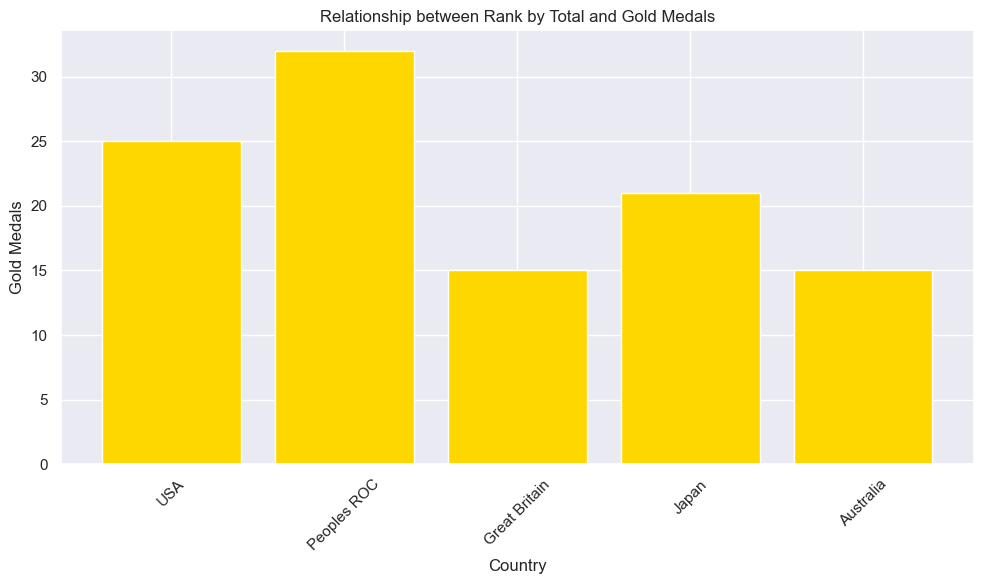

In [7]:
# Exploratory Data Analysis 4 [Cassidy]

# Create bar chart to show relationship between rank by total medals and gold medals

countries = ['Peoples ROC', 'USA', 'Japan','Great Britain', 'Australia']
total_medals = [70, 77, 40, 48, 36]
gold_medals = [32, 25, 21, 15, 15]
ranks = [2, 1, 5, 4, 6]

# combined data for each country
data = list(zip(countries, total_medals, gold_medals, ranks))

#sort the dictionary based on ranks (didnt do at first so it confused data)
sorted_data = sorted(data, key=lambda x: x[3])

# next sort the countries and gold medals
sorted_countries = [item[0] for item in sorted_data]
sorted_gold_medals = [item[2]for item in sorted_data]

# Create a bar plot using Matplotlib
plt.figure(figsize=(10,6))
plt.bar(sorted_countries, sorted_gold_medals, color='gold')

# label the axis' and title
plt.title('Relationship between Rank by Total and Gold Medals')
plt.xlabel('Country')
plt.ylabel('Gold Medals')

# Rotate x-axis to make it easier to read and adjust layout to prevent possible cut off of labels
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

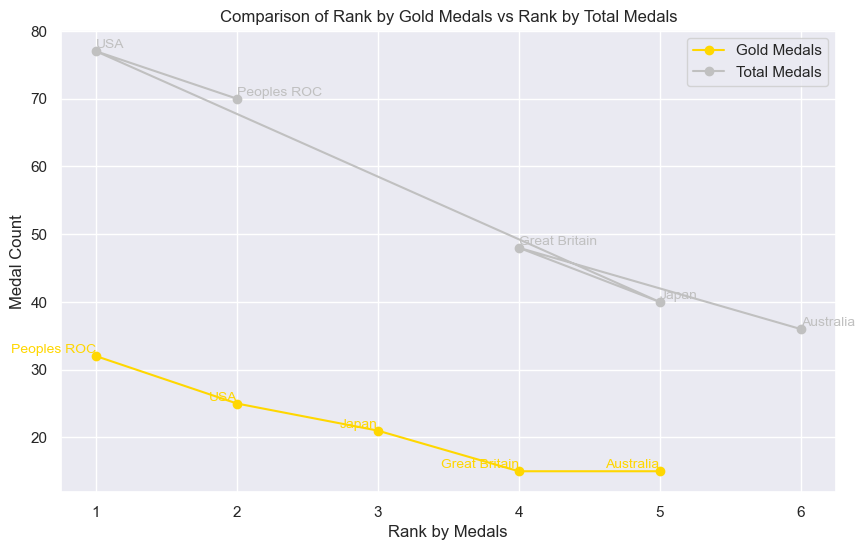

In [8]:
# Exploratory Data Analysis 5 [Cassidy]

import matplotlib.pyplot as plt

countries = ['Peoples ROC', 'USA', 'Japan', 'Great Britain', 'Australia']
total_medals = [70, 77, 40, 48, 36]
gold_medals = [32, 25, 21, 15, 15]
ranks_by_gold = [1, 2, 3, 4, 5]
ranks_by_total = [2, 1, 5, 4, 6]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the line chart
ax.plot(ranks_by_gold, gold_medals, marker='o', label='Gold Medals', color='gold')
ax.plot(ranks_by_total, total_medals, marker='o', label= 'Total Medals', color= 'silver')

# Add data labels
for i, country in enumerate(countries):
    ax.text(ranks_by_gold[i], gold_medals[i], country, fontsize=10, ha='right', va='bottom', color='gold')
for i, country in enumerate(countries):
    ax.text(ranks_by_total[i], total_medals[i], country, fontsize=10, ha='left', va='bottom', color='silver')

# Set labels and title
ax.set_xlabel('Rank by Medals')
ax.set_ylabel('Medal Count')
ax.set_title('Comparison of Rank by Gold Medals vs Rank by Total Medals')
ax.legend()

# Display the line chart
plt.show()

___
# Feature Selection

In [9]:
# X represents the features or independent variables of the dataset that are being used to make predictions.
# In this case, we are just selecting the number of gold & silver medals earned by each country.
# (To try to predict the total medals earned by each country.)

X_medals = medals[['Gold', 'Silver']]
X_medals.head()

,Gold,Silver
0,32,22
1,25,30
2,21,7
3,15,18
4,15,4


In [10]:
# y represents the target or dependent variable of the dataset that we want to predict.
# In this case, we are selecting the total number of medals earned by each country.
# (To see if it can be predicted by the gold & silver medals earned by each country.)

y_medals = medals['Total']
y_medals.head()

0    70
1    77
2    40
3    48
4    36
Name: Total, dtype: int64

___
# Train Test Split

In [11]:
# Import train_test_split to split the dataset of selected features into training and testing sets.
# This allows us to train our model on one subset of the data and evaluate its performance on another, unseen subset.
# Random state is specified for the sake of consistency/simplicity.

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_medals, y_medals, random_state=1)

___
# Models / Algorithms

## Supervised Learning
Since the goal of this project is to see if we can predict the total number of medals earned by teams based only on the number of gold and silver medals they've earned, we are using supervised learning wherein the algorithm is trained on a labelled dataset, and the input/output variables are known. The algorithms used here should learn about the relationship between the input/output variables, in order to make predictions on new/unseen data.

## Regression
Since the output variable is continuous (as opposed to categorical), and the goal is to predict its value based on input variables, this is a regression problem. Therefore, we are going to stick with regression algorithms (as opposed to classification algorithms).

# ___
## Model 1 - LinearRegression

In [12]:
# First, we will try LinearRegression.

from sklearn.linear_model import LinearRegression   # choose model class
model = LinearRegression()                          # instantiate model
model.fit(Xtrain, ytrain)                           # fit model to data
test_pred = model.predict(Xtest)                    # predict on new data

# print(test_pred)                                    # print predicted totals
# print(ytest)                                        # and actual/true totals
# #                                                   # just for quick/rough comparison

In [13]:
# Now, we shall evaluate.

# Import mean squared error metric for performance evaluation.
# Measures the average squared difference between the predicted and true values of the output variable.

from sklearn.metrics import mean_squared_error

# Calculate the mean squared error.

mse = mean_squared_error(ytest, test_pred)

# Calculate the root mean squared error for more intuitive interpretation.

rmse = mean_squared_error(ytest, test_pred, squared=False)

# Import R-squared metric for additional performance evaluation.
# Measures how well the model explains the variation in the output variable.

from sklearn.metrics import r2_score

# Calculate the R-squared value.

r2 = r2_score(ytest, test_pred)

# Print the results as floats with 3 decimal points.

print('LinearRegression Evaluation')
print()
print(f'Mean squared error:         {mse:.3f}')
print(f'Root mean squared error:    {rmse:.3f}')
print('Note: Value of 0 indicates perfect fit. Smaller value is better.')
print()
print(f'R-squared value:            {r2:.3f}')
print('Note: Value of 1 indicates perfect fit. Value ranges from 0 to 1.')

LinearRegression Evaluation

Mean squared error:         3.873
Root mean squared error:    1.968
Note: Value of 0 indicates perfect fit. Smaller value is better.

R-squared value:            0.947
Note: Value of 1 indicates perfect fit. Value ranges from 0 to 1.


___
## Model 2 - DecisionTreeRegressor

In [14]:
# Next, we will try DecisionTreeRegressor.

# There is some randomness inherent to this algorithm,
# despite the random state being specified for the train_test_split.

# Therefore, random state is specified below as well,
# for the sake of consistency/simplicity.

from sklearn.tree import DecisionTreeRegressor  # re-choose model class
model = DecisionTreeRegressor(random_state=1)   # re-instantiate model
model.fit(Xtrain, ytrain)                       # re-fit model to data
test_pred = model.predict(Xtest)                # re-predict on new data

# print(test_pred)                                # re-print predicted totals
# print(ytest)                                    # and actual/true totals
# #                                               # just for quick/rough comparison

In [15]:
# Now, we shall re-evaluate.

# Re-calculate the mean squared error.

mse = mean_squared_error(ytest, test_pred)

# Re-calculate the root mean squared error for more intuitive interpretation.

rmse = mean_squared_error(ytest, test_pred, squared=False)

# Re-calculate the R-squared value.

r2 = r2_score(ytest, test_pred)

# Re-print the results as floats with 3 decimal points.

print('DecisionTreeRegressor Evaluation')
print()
print(f'Mean squared error:         {mse:.3f}')
print(f'Root mean squared error:    {rmse:.3f}')
print('Note: Value of 0 indicates perfect fit. Smaller value is better.')
print()
print(f'R-squared value:            {r2:.3f}')
print('Note: Value of 1 indicates perfect fit. Value ranges from 0 to 1.')

DecisionTreeRegressor Evaluation

Mean squared error:         6.972
Root mean squared error:    2.640
Note: Value of 0 indicates perfect fit. Smaller value is better.

R-squared value:            0.905
Note: Value of 1 indicates perfect fit. Value ranges from 0 to 1.


___
## Model 3 - RandomForestRegressor

In [16]:
# Next, we will try RandomForestRegressor.

# There is some randomness inherent to this algorithm,
# despite the random state being specified for the train_test_split.

# Therefore, random state is specified below as well,
# for the sake of consistency/simplicity.

from sklearn.ensemble import RandomForestRegressor  # re-choose model class
model = RandomForestRegressor(random_state=1)       # re-instantiate model
model.fit(Xtrain, ytrain)                           # re-fit model to data
test_pred = model.predict(Xtest)                    # re-predict on new data

# print(test_pred)                                    # re-print predicted totals
# print(ytest)                                        # and actual/true totals
# #                                                   # just for quick/rough comparison

In [17]:
# ... re-evaluate.

# Re-calculate the mean squared error.

mse = mean_squared_error(ytest, test_pred)

# Re-calculate the root mean squared error for more intuitive interpretation.

rmse = mean_squared_error(ytest, test_pred, squared=False)

# Re-calculate the R-squared value.

r2 = r2_score(ytest, test_pred)

# Re-print the results as floats with 3 decimal points.

print('RandomForestRegressor Evaluation')
print()
print(f'Mean squared error:         {mse:.3f}')
print(f'Root mean squared error:    {rmse:.3f}')
print('Note: Value of 0 indicates perfect fit. Smaller value is better.')
print()
print(f'R-squared value:            {r2:.3f}')
print('Note: Value of 1 indicates perfect fit. Value ranges from 0 to 1.')

RandomForestRegressor Evaluation

Mean squared error:         5.256
Root mean squared error:    2.293
Note: Value of 0 indicates perfect fit. Smaller value is better.

R-squared value:            0.928
Note: Value of 1 indicates perfect fit. Value ranges from 0 to 1.


___
## Model 4 - SupportVectorRegression

In [18]:
# Lastly, we will try SupportVectorRegression.

from sklearn.svm import SVR         # re-choose model class
model = SVR()                       # re-instantiate model
model.fit(Xtrain, ytrain)           # re-fit model to data
test_pred = model.predict(Xtest)    # re-predict on new data

# print(test_pred)                    # re-print predicted totals
# print(ytest)                        # and actual/true totals
# #                                   # just for quick/rough comparison

In [19]:
# ... re-evaluate.

# Re-calculate the mean squared error.

mse = mean_squared_error(ytest, test_pred)

# Re-calculate the root mean squared error for more intuitive interpretation.

rmse = mean_squared_error(ytest, test_pred, squared=False)

# Re-calculate the R-squared value.

r2 = r2_score(ytest, test_pred)

# Re-print the results as floats with 3 decimal points.

print('SVR Evaluation')
print()
print(f'Mean squared error:         {mse:.3f}')
print(f'Root mean squared error:    {rmse:.3f}')
print('Note: Value of 0 indicates perfect fit. Smaller value is better.')
print()
print(f'R-squared value:            {r2:.3f}')
print('Note: Value of 1 indicates perfect fit. Value ranges from 0 to 1.')

SVR Evaluation

Mean squared error:         37.909
Root mean squared error:    6.157
Note: Value of 0 indicates perfect fit. Smaller value is better.

R-squared value:            0.483
Note: Value of 1 indicates perfect fit. Value ranges from 0 to 1.


___